# Brief about dataset

## Reduction of child mortality is reflected in several of the United Nations' Sustainable Development Goals and is a key indicator of human progress.

The UN expects that by 2030, countries end preventable deaths of newborns and children under 5 years of age, with all countries aiming to reduce under‑5 mortality to at least as low as 25 per 1,000 live births.

Parallel to notion of child mortality is of course maternal mortality, which accounts for 295 000 deaths during and following pregnancy and childbirth (as of 2017). The vast majority of these deaths (94%) occurred in low-resource settings, and most could have been prevented.

In light of what was mentioned above, Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.

### This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetritians into 3 classes which represents our target values:

- Normal
- Suspect
- Pathological

### Columns info

- 'baseline value'- FHR baseline (beats per minute)
- 'accelerations'- Number of accelerations per second
- 'fetal_movement'- Number of fetal movements per second
- 'uterine_contractions'- Number of uterine contractions per second
- 'light_decelerations'- Number of light decelerations per second
- 'severe_decelerations'- Number of severe decelerations per second
- 'prolongued_decelerations'- Number of prolonged decelerations per second
- 'abnormal_short_term_variability'- Percentage of time with abnormal short term variability
- 'mean_value_of_short_term_variability'- Mean value of short term variability
- 'percentage_of_time_with_abnormal_long_term_variability'- Percentage of time with abnormal long term variability
- 'mean_value_of_long_term_variability'- Mean value of long term variability
- 'histogram_width'- Width of FHR histogram
- 'histogram_min'- Minimum (low frequency) of FHR histogram
- 'histogram_max'- Maximum (high frequency) of FHR histogram
- 'histogram_number_of_peaks'- Number of histogram peaks
- 'histogram_number_of_zeroes'- Number of histogram zeros
- 'histogram_mode'- Histogram mode
- 'histogram_mean'- Histogram mean
- 'histogram_median'- Histogram median
- 'histogram_variance'- Histogram variance
- 'histogram_tendency'- Histogram tendency

# Importing needed libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [2]:
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score,confusion_matrix, mean_absolute_error , r2_score , mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import warnings
warnings.filterwarnings("ignore")
le = LabelEncoder()

# Reading libraries

In [3]:
data=pd.read_csv("fetal_health.csv")
data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [5]:
data.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [6]:
#Checking null values

In [7]:
data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [8]:
# getting the dataset's rows and columns by invoking the shape() function
data.shape

(2126, 22)

In [9]:
#Check types for all the columns using dtypes
data.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

In [10]:
data.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

<AxesSubplot:>

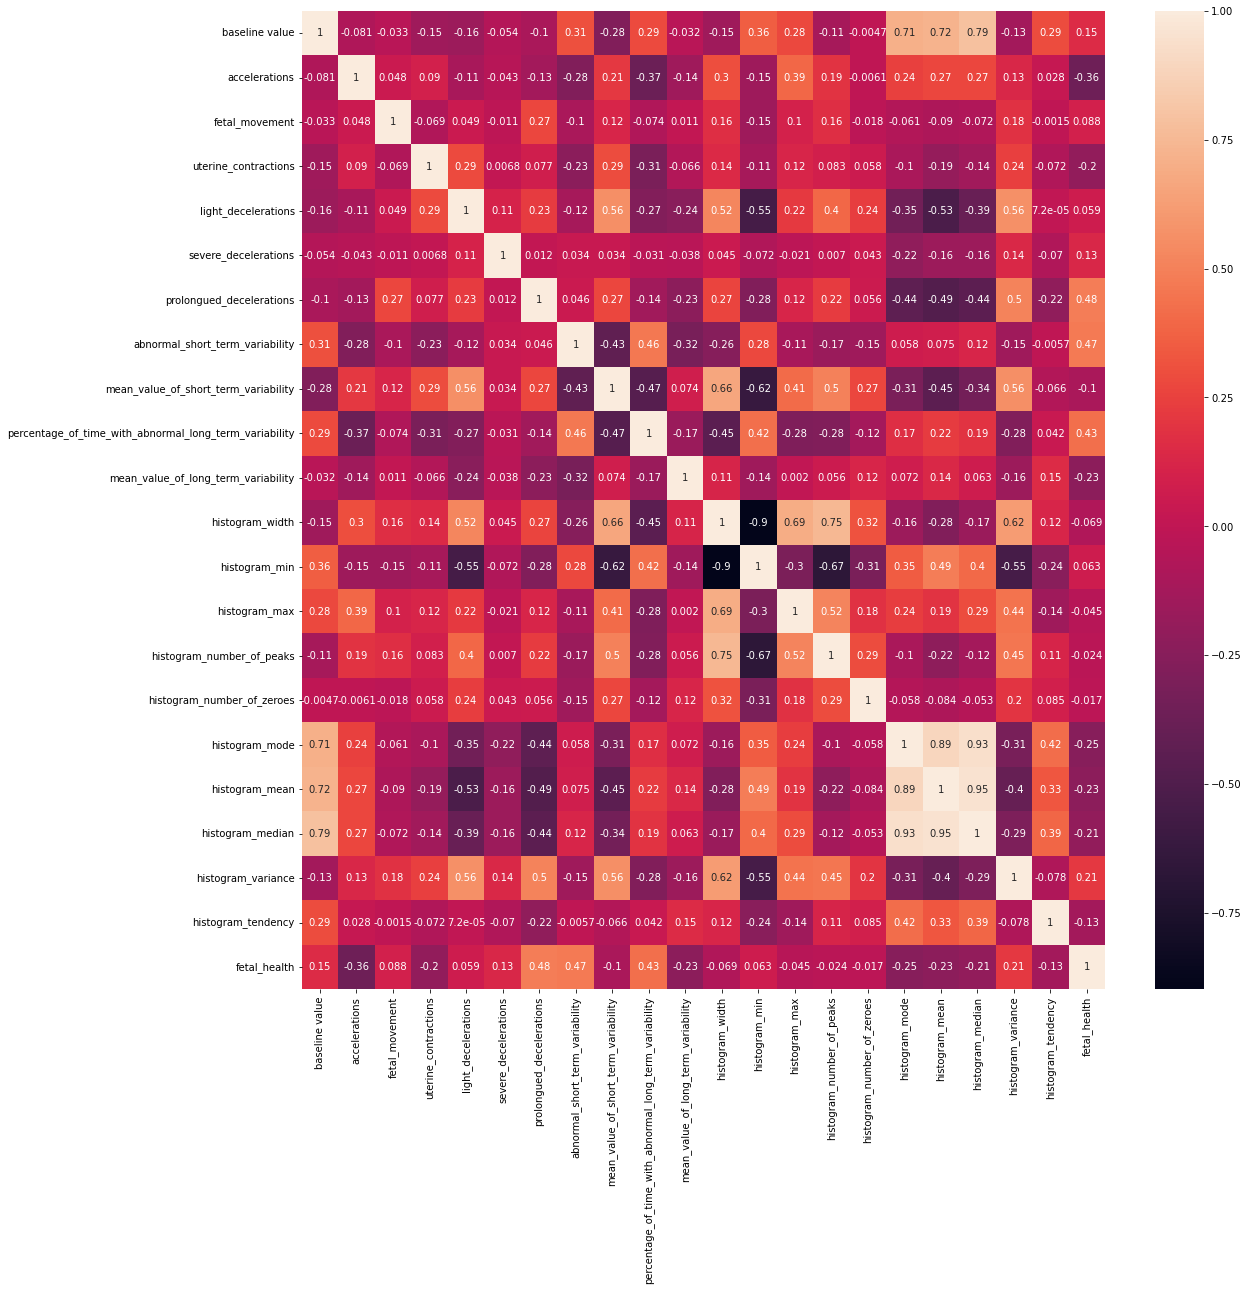

In [11]:
plt.subplots(figsize = (18, 18))
sns.heatmap(data.corr(), annot = True)

In [12]:
correlated_features = set()
correlation_matrix = data.corr()

In [13]:
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [14]:
len(correlated_features)

5

In [15]:
print(correlated_features)

{'histogram_number_of_peaks', 'histogram_mode', 'histogram_min', 'histogram_median', 'histogram_mean'}


distplot_data=data.loc[:,['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']]

fig = plt.figure(figsize=(18, 20))
for i, column in enumerate(distplot_data.columns, 1):
    f=plt.subplot(7,5,i)
    sns.distplot(distplot_data[column], color="blue",fit_kws={"color":"darkgreen"});

<AxesSubplot:ylabel='fetal_health'>

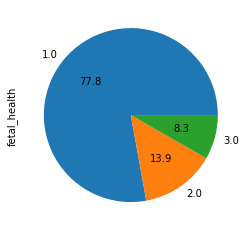

In [16]:
round(data['fetal_health'].value_counts()/ data.shape[0]*100,2).plot.pie(autopct = '%1.1f')

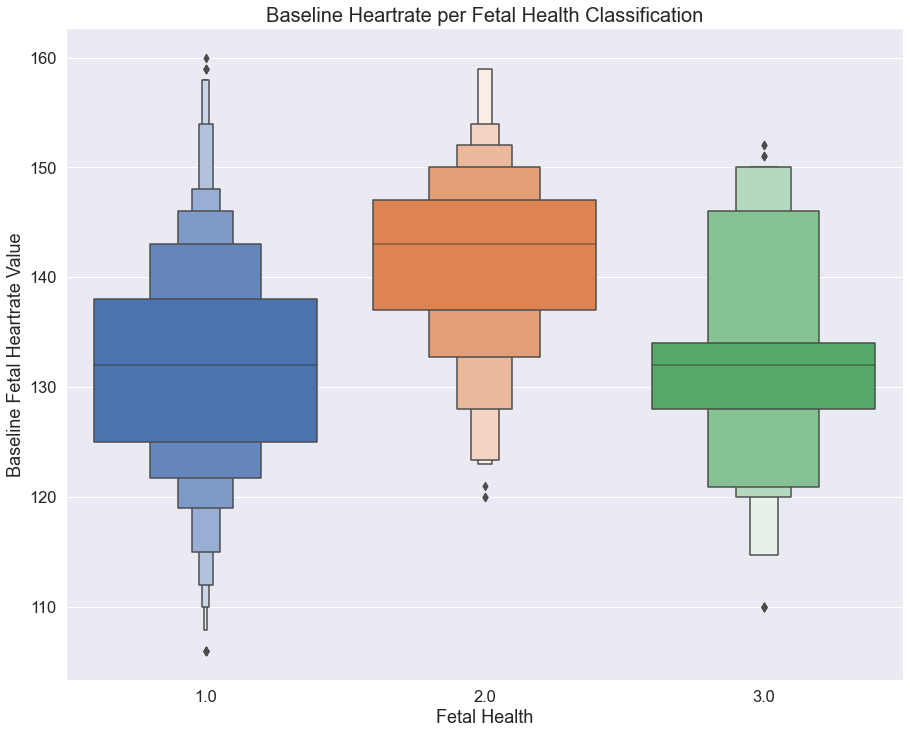

In [17]:
sns.set(font_scale=1.5)
plt.figure(figsize=(15,12))
g = sns.boxenplot(x='fetal_health', y='baseline value', data=data,
             saturation=1.5)
g.set_xlabel('Fetal Health')
g.set_ylabel('Baseline Fetal Heartrate Value')
g.set_title('Baseline Heartrate per Fetal Health Classification', fontsize=20)
plt.show()

array([[<AxesSubplot:title={'center':'baseline value'}>,
        <AxesSubplot:title={'center':'accelerations'}>,
        <AxesSubplot:title={'center':'fetal_movement'}>,
        <AxesSubplot:title={'center':'uterine_contractions'}>,
        <AxesSubplot:title={'center':'light_decelerations'}>],
       [<AxesSubplot:title={'center':'severe_decelerations'}>,
        <AxesSubplot:title={'center':'prolongued_decelerations'}>,
        <AxesSubplot:title={'center':'abnormal_short_term_variability'}>,
        <AxesSubplot:title={'center':'mean_value_of_short_term_variability'}>,
        <AxesSubplot:title={'center':'percentage_of_time_with_abnormal_long_term_variability'}>],
       [<AxesSubplot:title={'center':'mean_value_of_long_term_variability'}>,
        <AxesSubplot:title={'center':'histogram_width'}>,
        <AxesSubplot:title={'center':'histogram_min'}>,
        <AxesSubplot:title={'center':'histogram_max'}>,
        <AxesSubplot:title={'center':'histogram_number_of_peaks'}>],
      

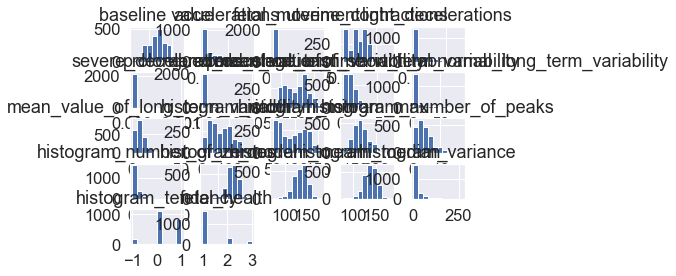

In [18]:
data.hist()

# Checking for outliers

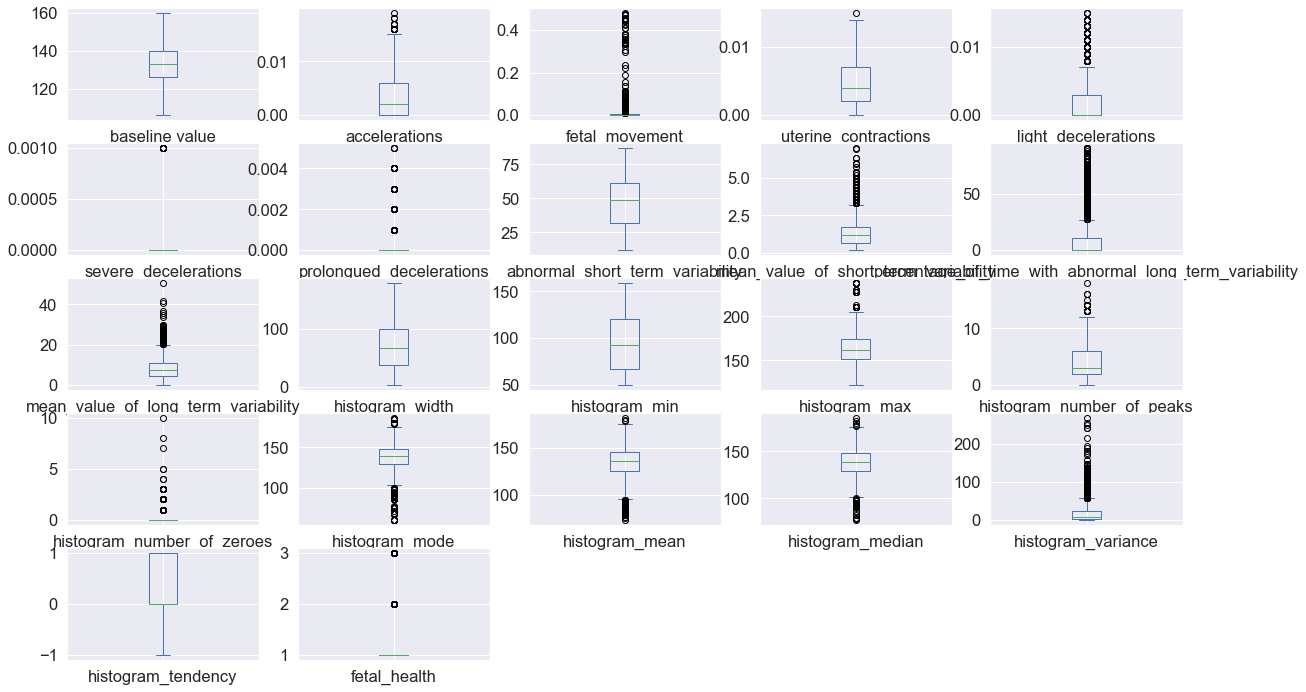

In [19]:
data.plot(kind = "box" , subplots = True , layout= (5,5), figsize =(20,12) )
plt.show()

Text(0.5, 1.0, 'Distributions before removing outliers')

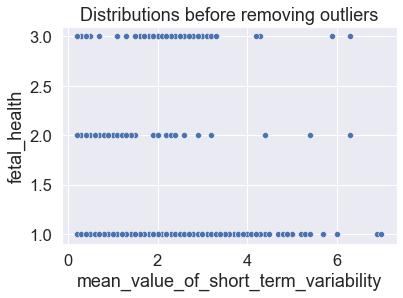

In [20]:
sns.scatterplot(x=data['mean_value_of_short_term_variability'],y=data['fetal_health'])
plt.title('Distributions before removing outliers')

In [21]:
data[data['mean_value_of_short_term_variability']>=4.5].shape

(21, 22)

In [22]:
data=data[data['mean_value_of_short_term_variability']<4.5]

Text(0.5, 1.0, 'Distributions after removing outliers')

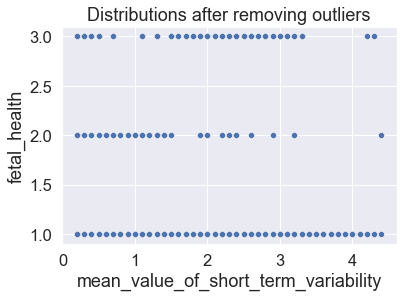

In [23]:
sns.scatterplot(x=data['mean_value_of_short_term_variability'],y=data['fetal_health'])
plt.title('Distributions after removing outliers')

Text(0.5, 1.0, 'Distributions before removing outliers')

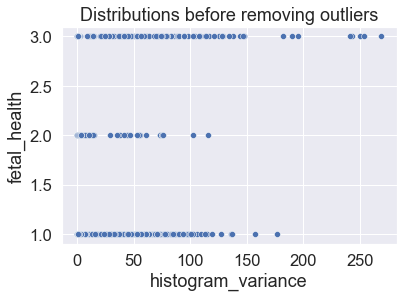

In [24]:
sns.scatterplot(x=data['histogram_variance'],y=data['fetal_health'])
plt.title('Distributions before removing outliers')

In [25]:
data[data['histogram_variance']>=100].shape

(49, 22)

In [26]:
data=data[data['histogram_variance']<100]

Text(0.5, 1.0, 'Distributions after removing outliers')

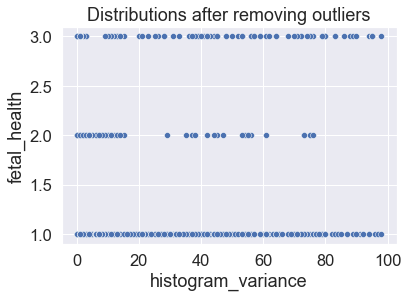

In [27]:
sns.scatterplot(x=data['histogram_variance'],y=data['fetal_health'])
plt.title('Distributions after removing outliers')

Text(0.5, 1.0, 'Distributions before removing outliers')

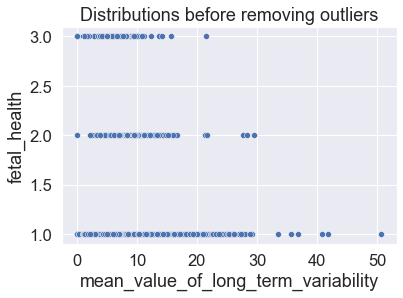

In [28]:
sns.scatterplot(x=data['mean_value_of_long_term_variability'],y=data['fetal_health'])
plt.title('Distributions before removing outliers')

In [29]:
data[data['mean_value_of_long_term_variability']>=28].shape

(12, 22)

In [30]:
data=data[data['mean_value_of_long_term_variability']<28]

Text(0.5, 1.0, 'Distributions after removing outliers')

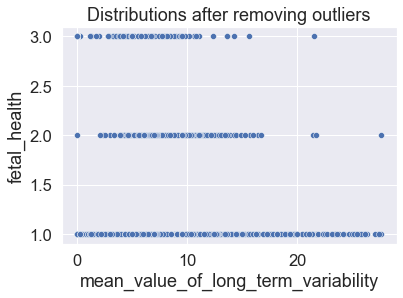

In [31]:
sns.scatterplot(x=data['mean_value_of_long_term_variability'],y=data['fetal_health'])
plt.title('Distributions after removing outliers')

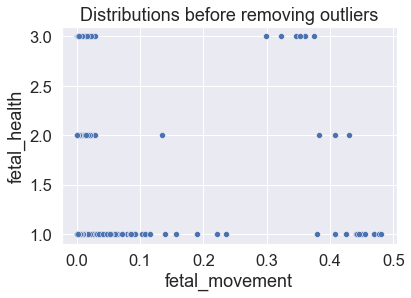

In [32]:
sns.scatterplot(x=data['fetal_movement'],y=data['fetal_health'])
plt.title('Distributions before removing outliers')
figsize =(5,5) 

In [33]:
data[data['fetal_movement']>=0.06].shape

(46, 22)

In [34]:
data=data[data['fetal_movement']<0.06]

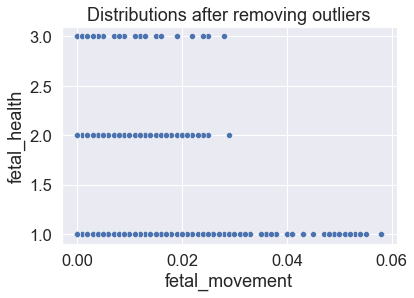

In [35]:
sns.scatterplot(x=data['fetal_movement'],y=data['fetal_health'])
plt.title('Distributions after removing outliers')
figsize =(8,8)

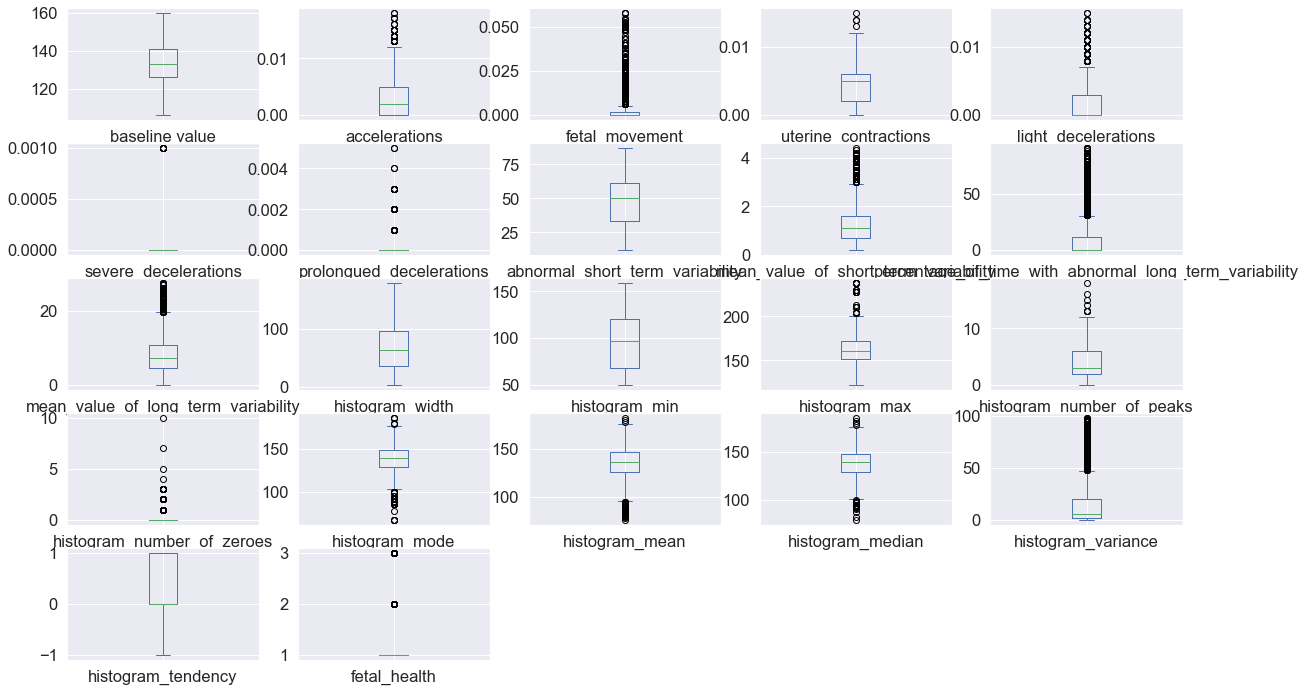

In [36]:
data.plot(kind = "box" , subplots = True , layout= (5,5), figsize =(20,12) )
plt.show()

In [37]:
x = data.drop(['fetal_health'], axis=1).values
y = data['fetal_health'].values

In [38]:
# Create train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [39]:
x_train.shape

(1598, 21)

In [40]:
x_test.shape

(400, 21)

In [41]:
y_train.shape

(1598,)

In [42]:
x_train.shape

(1598, 21)

In [43]:
# Scale train/ test predictors based on training data
ro_scaler = RobustScaler().fit(x_train)
x_train_scaled = ro_scaler.transform(x_train)
x_test_scaled = ro_scaler.transform(x_test)

In [44]:
def resultsSummarizer(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    sensitivity = recall_score(y_true,y_pred,average='macro')
    
    
    print(f'Accuracy Score: ' + '{:.4%}'.format(acc))
    print(f'Precision Score: ' + '{:.4%}'.format(prec))
    print(f'Recall Score: ' + '{:.4%}'.format(rec))
    print(f'F_1 Score: ' + '{:.4%}'.format(f1))
    print(f'Sensitvity: ' + '{:.4%}'.format(sensitivity))

In [45]:
lr = LogisticRegression()
lr.fit(x_train , y_train)

LogisticRegression()

In [46]:
lr.score(x_train , y_train)

0.8748435544430538

In [47]:
lr.score(x_test , y_test)

0.815

In [48]:
lr2=LogisticRegression()

In [49]:
lr2.fit(x_train_scaled,y_train)


LogisticRegression()

In [50]:
lr2.score(x_train_scaled , y_train)

0.9080100125156445

In [51]:
lr2.score(x_test_scaled , y_test)

0.89

In [52]:
y_pred_lr = lr.predict(x_test_scaled)

In [53]:
resultsSummarizer(y_test, y_pred_lr)

Accuracy Score: 33.5000%
Precision Score: 39.4392%
Recall Score: 46.6828%
F_1 Score: 26.6212%
Sensitvity: 46.6828%


In [54]:
k1=KNeighborsClassifier(n_neighbors=5)
k1.fit(x_train,y_train)

KNeighborsClassifier()

In [55]:
k1.score(x_train,y_train)

0.9180225281602002

In [56]:
k1.score(x_test,y_test)

0.8875

In [57]:
y_pred=lr.predict(x_test)
data=pd.DataFrame({'y_Test  ':y_test,'y_pred  ':y_pred})
data[:10]

,y_Test,y_pred
0,2.0,2.0
1,2.0,2.0
2,2.0,1.0
3,3.0,3.0
4,1.0,1.0
5,2.0,1.0
6,1.0,1.0
7,1.0,2.0
8,1.0,1.0
9,1.0,1.0


In [58]:
k2 = KNeighborsClassifier(n_neighbors=5)
k2.fit(x_train_scaled, y_train)
y_pred_knn = k2.predict(x_test_scaled)

In [59]:
resultsSummarizer(y_test, y_pred_knn)

Accuracy Score: 90.5000%
Precision Score: 86.4688%
Recall Score: 80.2474%
F_1 Score: 83.0303%
Sensitvity: 80.2474%


In [60]:
dt=DecisionTreeClassifier(max_depth=14)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=14)

In [61]:
dt.score(x_train,y_train)

0.9987484355444305

In [62]:
dt.score(x_test,y_test)

0.91

In [63]:
dt.fit(x_train_scaled, y_train)
y_pred_tree = dt.predict(x_test_scaled)

In [64]:
resultsSummarizer(y_test, y_pred_tree)

Accuracy Score: 91.0000%
Precision Score: 88.0657%
Recall Score: 84.6364%
F_1 Score: 86.2629%
Sensitvity: 84.6364%


In [65]:
rf=RandomForestClassifier(max_depth=5)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=5)

In [66]:
rf.score(x_train,y_train)

0.9355444305381727

In [67]:
rf.score(x_test,y_test)

0.915

In [68]:
rfst = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=None, min_samples_leaf=1, min_samples_split=2)
rfst.fit(x_train_scaled, y_train)
y_pred_rfst = rfst.predict(x_test_scaled)

In [69]:
resultsSummarizer(y_pred_rfst, y_test)

Accuracy Score: 93.7500%
Precision Score: 87.6137%
Recall Score: 89.0638%
F_1 Score: 88.3053%
Sensitvity: 89.0638%


In [70]:
C_grid = 0.02*np.arange(1,20)
gamma_grid = 0.02*np.arange(1,50)
print(C_grid,gamma_grid)
parameters = {'C': C_grid, 'gamma' : gamma_grid}
gridCV = GridSearchCV(SVC(kernel='rbf'), parameters, n_jobs=-1)             
gridCV.fit(x_train,y_train)
best_C = gridCV.best_params_['C']
best_gamma = gridCV.best_params_['gamma']



[0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26 0.28
 0.3  0.32 0.34 0.36 0.38] [0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26 0.28
 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54 0.56
 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82 0.84
 0.86 0.88 0.9  0.92 0.94 0.96 0.98]


In [71]:
print("Best C "+str(best_C))
print("Best Gamma "+str(best_gamma))

Best C 0.38
Best Gamma 0.02


In [72]:
lin = SVC(kernel='linear',C=best_C,gamma=best_gamma)
lin.fit(x_train, y_train)

SVC(C=0.38, gamma=0.02, kernel='linear')

In [73]:
y_pred_Linear = lin.predict(x_test)
print(classification_report(y_test, y_pred_Linear))

              precision    recall  f1-score   support

         1.0       0.92      0.94      0.93       309
         2.0       0.64      0.53      0.58        60
         3.0       0.73      0.77      0.75        31

    accuracy                           0.87       400
   macro avg       0.76      0.75      0.75       400
weighted avg       0.86      0.87      0.87       400



In [74]:
resultsSummarizer(y_pred_Linear, y_test)

Accuracy Score: 87.0000%
Precision Score: 75.0837%
Recall Score: 76.2803%
F_1 Score: 75.4909%
Sensitvity: 76.2803%


In [75]:
rbf = SVC(kernel='rbf',C=1,gamma=0.6)
rbf.fit(x_train, y_train)

y_pred_RBF = rbf.predict(x_test)
print(classification_report(y_test, y_pred_RBF))

              precision    recall  f1-score   support

         1.0       0.77      1.00      0.87       309
         2.0       0.00      0.00      0.00        60
         3.0       0.00      0.00      0.00        31

    accuracy                           0.77       400
   macro avg       0.26      0.33      0.29       400
weighted avg       0.60      0.77      0.67       400



In [76]:
resultsSummarizer(y_test, y_pred_RBF)

Accuracy Score: 77.2500%
Precision Score: 25.7500%
Recall Score: 33.3333%
F_1 Score: 29.0550%
Sensitvity: 33.3333%


In [77]:
poly = SVC(kernel='poly',degree=3)
poly.fit(x_train, y_train)
y_pred_Poly = poly.predict(x_test)
print(classification_report(y_test, y_pred_Poly))

              precision    recall  f1-score   support

         1.0       0.91      0.94      0.92       309
         2.0       0.60      0.48      0.54        60
         3.0       0.67      0.71      0.69        31

    accuracy                           0.85       400
   macro avg       0.73      0.71      0.71       400
weighted avg       0.84      0.85      0.84       400



In [78]:
resultsSummarizer(y_test, y_pred_Poly)

Accuracy Score: 85.0000%
Precision Score: 72.5596%
Recall Score: 70.9429%
F_1 Score: 71.4973%
Sensitvity: 70.9429%


In [79]:
GNB = GaussianNB()
GNB.fit(x_train,y_train)
y_pred_Gauss = GNB.predict(x_test)

In [80]:
resultsSummarizer(y_test, y_pred_Gauss)

Accuracy Score: 78.5000%
Precision Score: 63.4800%
Recall Score: 72.2548%
F_1 Score: 65.8270%
Sensitvity: 72.2548%


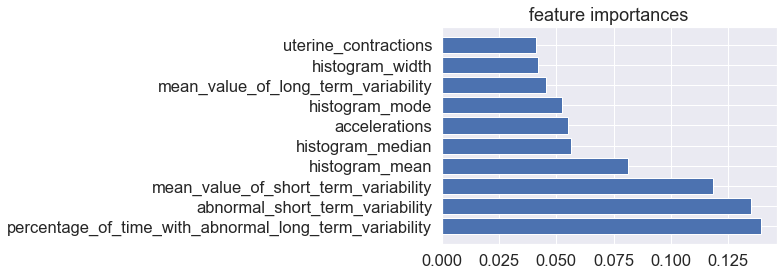

In [81]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances')
    plt.show()

# whatever your features are called
features_names = ['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']
    
rfst = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=None, min_samples_leaf=1, min_samples_split=2)
rfst.fit(x_train_scaled,y_train)
f_importances(abs(rfst.feature_importances_), features_names, top=10)


In [82]:
classifier_list = [lr, k2, dt, rf, lin,rbf,poly]
clf_name_list = ['Logistic Regression', 'KNeighborsClassifier', 'Decision Tree', 'Random Forest', 'svc_linear','rbf_svc','poly_svc']

for clf in classifier_list:
    clf.fit(x_train,y_train)

In [83]:
train_acc_list = []
test_acc_list = []

for clf,name in zip(classifier_list,clf_name_list):
    y_pred_train = clf.predict(x_train)
    y_pred_test = clf.predict(x_test)
    print(f'Using model: {name}')
    print(f'Trainning Score: {clf.score(x_train, y_train)}')
    print(f'Test Score: {clf.score(x_test, y_test)}')
    print(f'Acc Train: {accuracy_score(y_train, y_pred_train)}')
    print(f'Acc Test: {accuracy_score(y_test, y_pred_test)}')
    train_acc_list.append(accuracy_score(y_train, y_pred_train))
    test_acc_list.append(accuracy_score(y_test, y_pred_test))
    print('======================================================')

Using model: Logistic Regression
Trainning Score: 0.8748435544430538
Test Score: 0.815
Acc Train: 0.8748435544430538
Acc Test: 0.815
Using model: KNeighborsClassifier
Trainning Score: 0.9180225281602002
Test Score: 0.8875
Acc Train: 0.9180225281602002
Acc Test: 0.8875
Using model: Decision Tree
Trainning Score: 0.9993742177722152
Test Score: 0.905
Acc Train: 0.9993742177722152
Acc Test: 0.905
Using model: Random Forest
Trainning Score: 0.9374217772215269
Test Score: 0.915
Acc Train: 0.9374217772215269
Acc Test: 0.915
Using model: svc_linear
Trainning Score: 0.9055068836045056
Test Score: 0.87
Acc Train: 0.9055068836045056
Acc Test: 0.87
Using model: rbf_svc
Trainning Score: 0.9981226533166458
Test Score: 0.7725
Acc Train: 0.9981226533166458
Acc Test: 0.7725
Using model: poly_svc
Trainning Score: 0.8842302878598248
Test Score: 0.85
Acc Train: 0.8842302878598248
Acc Test: 0.85


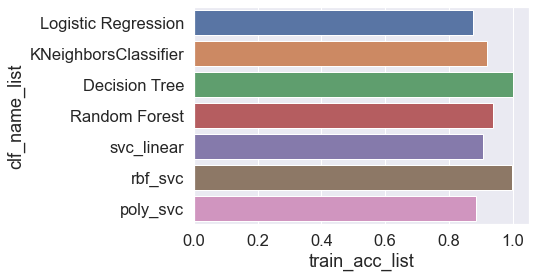

In [84]:
clf_name_list = np.array([clf_name_list]).reshape(7,1)
train_acc_list = np.array([train_acc_list]).reshape(7,1)
df = pd.DataFrame(clf_name_list,columns=["clf_name_list"])
df["train_acc_list"] = train_acc_list
sns.barplot(data=df,y="clf_name_list",x="train_acc_list");